# Phishing Website Prediction  Model Using Machine Learning 

Phishing is a type of cyberattack where attackers try to trick individuals into giving up sensitive information—like passwords, credit card numbers, or other personal data—by pretending to be a trustworthy entity.

Here’s how phishing typically works:

Deceptive Communication: The attacker sends a message (usually via email, but also through texts or social media) that looks like it's from a legitimate source—such as a bank, tech company, or government agency.

Urgency or Threats: The message often creates a sense of urgency or fear (e.g., “Your account will be suspended unless you act now”).

Fake Links or Attachments: The message includes a link to a fake website that mimics a real one, or an attachment that can install malware.

Data Collection: When the victim enters their information on the fake site or opens the attachment, the attacker captures it for malicious use.

Common Types of Phishing:
Spear Phishing: Targeted phishing aimed at a specific individual or company.

Whaling: Aimed at high-profile targets like executives.

Smishing: Phishing through SMS text messages.

Vishing: Phishing via phone calls (voice phishing).

Tip to Protect Yourself:

Always verify the sender's email address.

Don’t click on suspicious links.

Enable two-factor authentication.

Use spam filters and security software.

When in doubt, contact the organization directly using verified contact details.

In [3]:
# create a virtual environment use any command prompt, i used git and enter the below code
# python -m venv phishing-website

In [4]:
"""
streamlit
scikit-learn
pandas
numpy
matplotlib
seaborn
plotly
"""
# copy the above with out the threeple qoutes (""")  and paste them in a text file and call it requirements.txt
# install all my liberies via a requirement.txt file using the code in the single quote 'pip install -r requirements.txt' to install all the above 

'\nstreamlit\nscikit-learn\npandas\nnumpy\nmatplotlib\nseaborn\nplotly\n'

In [5]:
#import all the tools we need
# for regular exploratory data analysis and ploting liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#for plot to appear inline inside the notebook

# Laod Data

Dataset Overview Rows: 10,000
Columns: 50
Target variable: CLASS_LABEL (0 = benign, 1 = phishing)
No missing values detected in the dataset.
Data types: Most features are int64, with 3 being float64.

In [11]:
phishing_data = pd.read_csv("phishing.csv")
phishing_data

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [13]:
# Create X features
x = phishing_data.drop("CLASS_LABEL", axis = 1)

# Create y label
y = phishing_data["CLASS_LABEL"]


In [15]:
x

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,1,3,1,5,72,0,0,0,0,0,...,0,0,0,1,1,0,1,1,-1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,0,1,-1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,0
3,4,3,1,6,79,1,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,-1
4,5,3,0,4,46,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,0,1,1,-1,1,0,1
9996,9997,2,1,4,59,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
9998,9999,3,1,1,49,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1


In [17]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: CLASS_LABEL, Length: 10000, dtype: int64

In [19]:
*5777

















*-





//////////////p~hishing_data.shape

SyntaxError: invalid syntax (2818513235.py, line 19)

# Exploratory Data Analysis

In [22]:
# drop id column since pandas has given the dataset an id column already
phishing_data = phishing_data.drop(['id'], axis=1)

In [24]:
# check the dataset again fro the top or bottom by using head or tail
phishing_data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [26]:
"""
we get a dataframe of the same shape of phishing_data with True for each cell 
that is missing(NaN) but in this dataset there is no missing value
"""
# find out if there are any nul values in the dataset
phishing_data.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


Class Counts:
 CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64

Class Percentage:
 CLASS_LABEL
1    50.0
0    50.0
Name: proportion, dtype: float64


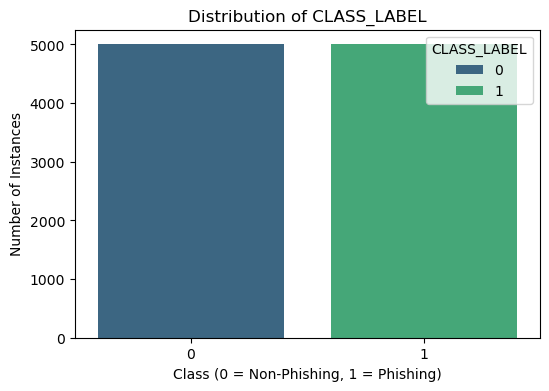

In [28]:
# Lets check the distribution of the feature and target variables in the dataset if there is any class imbalance
# and a graph to represent this
label_counts = phishing_data['CLASS_LABEL'].value_counts()
label_percent = phishing_data['CLASS_LABEL'].value_counts(normalize=True) * 100

#Display counts and percentages
print('Class Counts:\n', label_counts)
print('\nClass Percentage:\n', label_percent)

# The Graph Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, hue = label_counts.index, palette='viridis')
plt.title('Distribution of CLASS_LABEL')
plt.xlabel('Class (0 = Non-Phishing, 1 = Phishing)')
plt.ylabel('Number of Instances')
plt.xticks([0, 1])
plt.show()

In [30]:
# finding more information about the dataset, ie looking for what is unique to each column in terms of their data types if there is any
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [32]:
"""
this shows the statistical sumery for numerical columns and if you need to mormalise your data where there is too  much variance known as outliers, 
so that the model can do well
in this data set the max row data is too far from the the other records, you neeed to watch it when working on the model
"""
desc = phishing_data.describe()
desc

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


examining the mean, standard deviation, range, and quartiles of all features frm the describe cell above
Key Observations:
•	Features like UrlLength (mean = 70, std = 33) and NumDash (std = 3.1) show high variability.
•	Many binary features (e.g., AtSymbol, TildeSymbol, IframeOrFrame) have means close to 0 or 1, suggesting sparse distributions (mostly 0s or 1s).
•	Ratio Tranformed features such as UrlLengthRT, PctExtResourceUrlsRT, AbnormalExtFormActionR include negative values (-1), suggesting they are encoded transformations (e.g., -1 = missing or abnormal, 0 = normal, 1 = suspicious).


Preapare and Clean Ratio Transformed Feature
(Ratio Transformed) features is crucial for preparing your dataset for modeling. These Ratio transformed features (like UrlLengthRT, AbnormalExtFormActionR) often include values like -1, 0, 1 which represent:

-1: Missing or abnormal

0: Normal

1: Suspicious or risky

In [36]:
rto_variable = ["UrlLength", "PctExtResourceUrlsRT", "AbnormalExtFormActionR", "ExtMetaScriptLinkRT", "PctExtNullSelfRedirectHyperlinksRT",
               "SubdomainLevelRT"]

In [38]:
# Inspect Value Distribution
# check unique values and count of -1 for each Ratio transformed feature
for col in rto_variable:
    print(f"{col}:{phishing_data[col].value_counts(dropna=False).sort_index()}")

UrlLength:UrlLength
12     1
13     1
14     3
15     2
17     3
      ..
248    2
249    1
251    1
252    3
253    1
Name: count, Length: 226, dtype: int64
PctExtResourceUrlsRT:PctExtResourceUrlsRT
-1    2808
 0     851
 1    6341
Name: count, dtype: int64
AbnormalExtFormActionR:AbnormalExtFormActionR
-1     537
 0     994
 1    8469
Name: count, dtype: int64
ExtMetaScriptLinkRT:ExtMetaScriptLinkRT
-1    2139
 0    3988
 1    3873
Name: count, dtype: int64
PctExtNullSelfRedirectHyperlinksRT:PctExtNullSelfRedirectHyperlinksRT
-1    2953
 0     953
 1    6094
Name: count, dtype: int64
SubdomainLevelRT:SubdomainLevelRT
-1     100
 0     234
 1    9666
Name: count, dtype: int64


In [40]:
# lets look at columns with high variable, we will use std  > 1 as the threshold for high variability
# These features have unusually large ranges and standard deviations, which can skew your model performance if not normalized.
# We define high variability using standard deviation, identifying features where std is significantly large compared to their mean
# Selects features with high standard deviation, checking every column that was included in describe() it evaluates all numeric columns
high_features = desc.loc['std'][desc.loc['std']>1].index.tolist()
high_features

['NumDots',
 'PathLevel',
 'UrlLength',
 'NumDash',
 'NumUnderscore',
 'NumQueryComponents',
 'NumAmpersand',
 'NumNumericChars',
 'HostnameLength',
 'PathLength',
 'QueryLength']

In [42]:
# Binary features only two unique values (-1, 1 or 0, 1)
# Binary features often encode the presence or absence of phishing indicators These features are highly informative for classification tasks.
# This loops through every column in the DataFrame to check if it’s binary (i.e., has only 2 unique values). Again, this covers all 49 columns
binary_variable = [col for col in phishing_data.columns if phishing_data[col].nunique() == 2 ]
binary_variable

['AtSymbol',
 'TildeSymbol',
 'NumHash',
 'NoHttps',
 'RandomString',
 'IpAddress',
 'DomainInSubdomains',
 'DomainInPaths',
 'DoubleSlashInPath',
 'EmbeddedBrandName',
 'ExtFavicon',
 'InsecureForms',
 'RelativeFormAction',
 'ExtFormAction',
 'AbnormalFormAction',
 'FrequentDomainNameMismatch',
 'FakeLinkInStatusBar',
 'RightClickDisabled',
 'PopUpWindow',
 'SubmitInfoToEmail',
 'IframeOrFrame',
 'MissingTitle',
 'ImagesOnlyInForm',
 'CLASS_LABEL']

In [44]:
# Ratio Transformed Features for the who data set ends with (RT)
# Ratio-transformed features often encode normalized values like resource usage ratios, length deviations, etc. 
# These are already scaled but can carry edge-case information about phishing
# This scans every column name to check if it ends with "RT"  so again, all 49 are included in the check.
ratio_trans = [col for col in phishing_data.columns if col.endswith("RT")]
ratio_trans              

['SubdomainLevelRT',
 'UrlLengthRT',
 'PctExtResourceUrlsRT',
 'ExtMetaScriptLinkRT',
 'PctExtNullSelfRedirectHyperlinksRT']

In [46]:
len(phishing_data.columns)
# 50 (confirmed from your note: "10000 rows × 50 columns")

total_identified = set(ratio_trans + binary_variable + high_features)
len(total_identified)

40

In [48]:
# columns not classified
unclassified_features = set(phishing_data.columns) - total_identified
unclassified_features

{'AbnormalExtFormActionR',
 'HttpsInHostname',
 'NumDashInHostname',
 'NumPercent',
 'NumSensitiveWords',
 'PctExtHyperlinks',
 'PctExtResourceUrls',
 'PctNullSelfRedirectHyperlinks',
 'SubdomainLevel'}

In [50]:
all_columns = set(phishing_data.columns)
identified_columns = set(ratio_trans + binary_variable + high_features)

# What's missing?
unclassified_columns = all_columns - identified_columns

print("Unclassified columns:", unclassified_columns)
print("Total:", len(unclassified_columns))

Unclassified columns: {'NumPercent', 'PctNullSelfRedirectHyperlinks', 'SubdomainLevel', 'HttpsInHostname', 'PctExtHyperlinks', 'AbnormalExtFormActionR', 'NumSensitiveWords', 'PctExtResourceUrls', 'NumDashInHostname'}
Total: 9


In [52]:
# Combine all identified feature groups (high variability, binary, RT) with the unclassified ones into a single list for analysis to prepare them for corelation
all_selected_columns = list(identified_columns.union(unclassified_columns))
all_selected_columns

['SubdomainLevelRT',
 'EmbeddedBrandName',
 'HostnameLength',
 'IpAddress',
 'ExtFormAction',
 'PctNullSelfRedirectHyperlinks',
 'RightClickDisabled',
 'PathLevel',
 'NumDash',
 'ExtFavicon',
 'NumAmpersand',
 'SubdomainLevel',
 'AbnormalExtFormActionR',
 'PctExtResourceUrls',
 'PopUpWindow',
 'DoubleSlashInPath',
 'QueryLength',
 'TildeSymbol',
 'RandomString',
 'AbnormalFormAction',
 'UrlLength',
 'HttpsInHostname',
 'IframeOrFrame',
 'NumQueryComponents',
 'AtSymbol',
 'ExtMetaScriptLinkRT',
 'NumDashInHostname',
 'NumNumericChars',
 'CLASS_LABEL',
 'NumUnderscore',
 'SubmitInfoToEmail',
 'NumPercent',
 'NoHttps',
 'PctExtNullSelfRedirectHyperlinksRT',
 'NumDots',
 'RelativeFormAction',
 'DomainInPaths',
 'NumHash',
 'MissingTitle',
 'FakeLinkInStatusBar',
 'FrequentDomainNameMismatch',
 'NumSensitiveWords',
 'ImagesOnlyInForm',
 'DomainInSubdomains',
 'PathLength',
 'PctExtResourceUrlsRT',
 'PctExtHyperlinks',
 'InsecureForms',
 'UrlLengthRT']

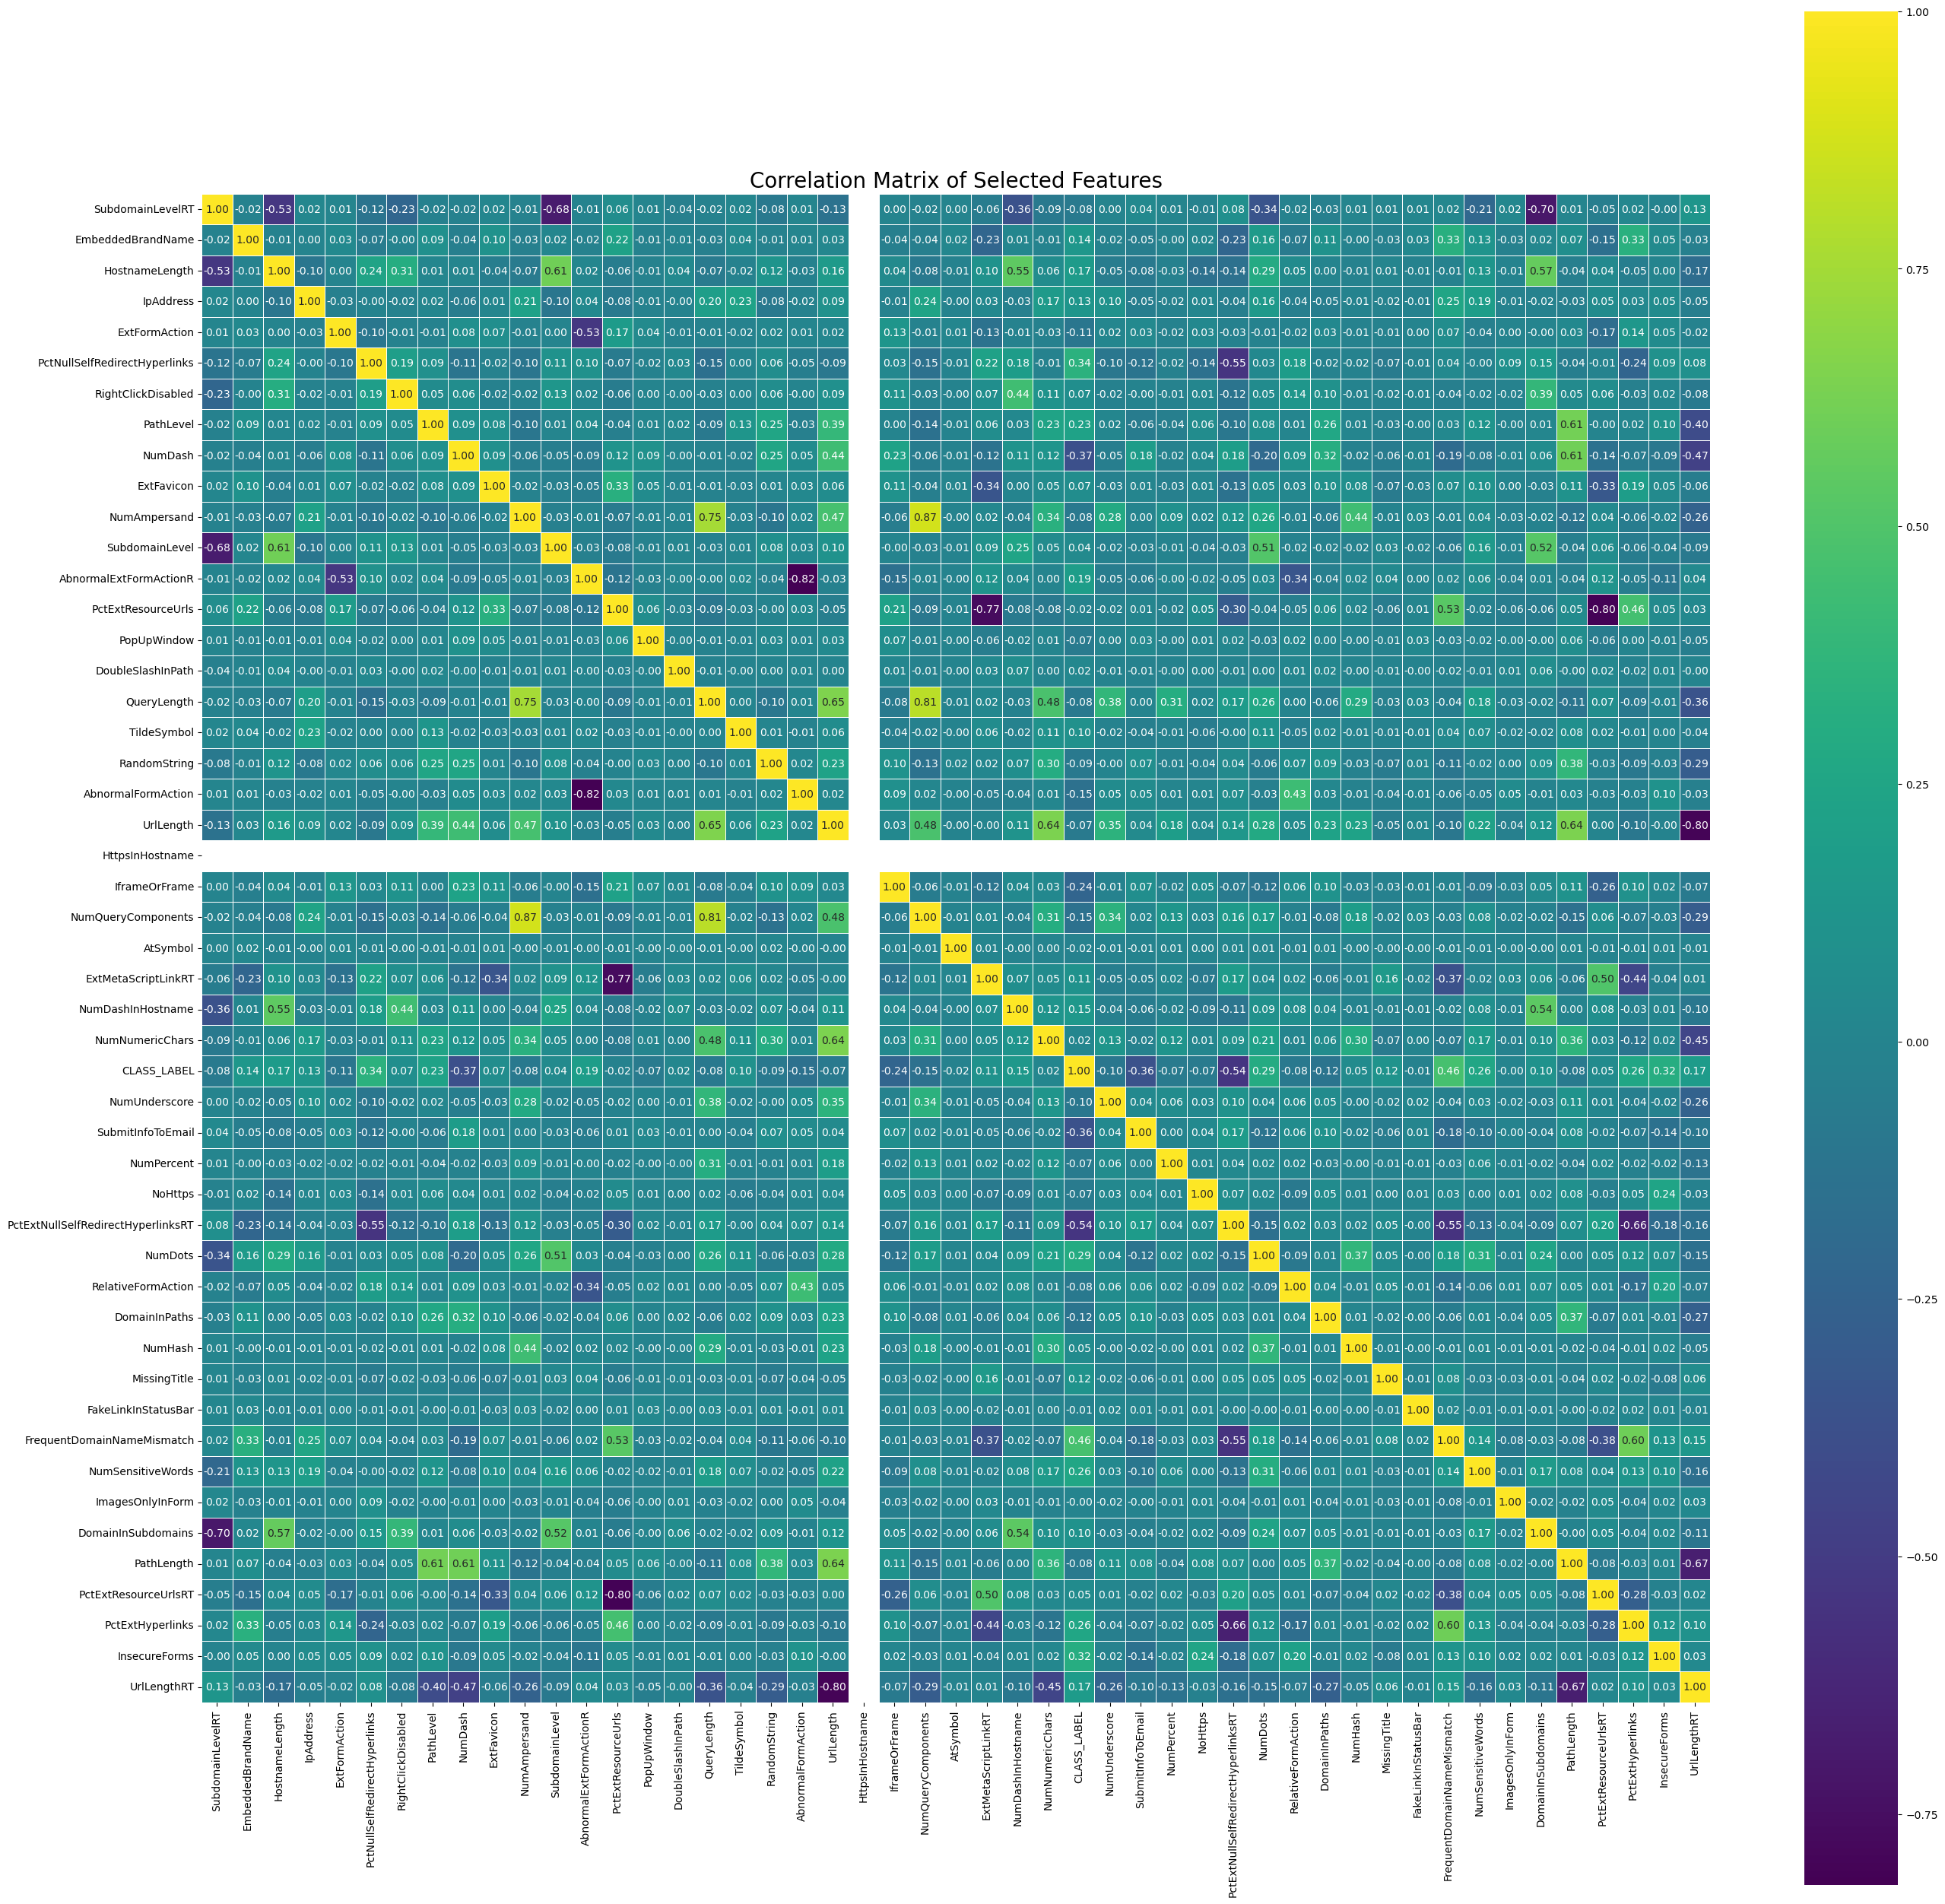

In [54]:
#correlation will help you choose the right colums from the data set for the machine learning modeling 
#proper as you can not use all 49 columns and 10000 data as it will take time to train the model 
#and it will not be easy to fit it to an application, so use principle component analysis to shrink the 
#dataset, so use a heat map to do this and measure how each column relates to another 
#in the last collumn for class label, we are looking out for columns whose values are close to 1 in 
#the extreme end for the class label 1, implying these columns are able to influence the class label 
#either positive or negative as you can take the absolute value which takes out negative 
#from reaserch a higher positive value means a higher positive correlation and a higher negative value means a higher negative correlation
plt.figure(figsize=(32, 32))
sns.heatmap(phishing_data[all_selected_columns].corr(),
           annot=True,
           cmap='viridis',
           linewidths=0.5,
           fmt=".2f",
           square=True)
plt.title("Correlation Matrix of Selected Features", fontsize=20)
plt.show()

In [56]:
selected_data = phishing_data[all_selected_columns]
selected_data.columns

Index(['SubdomainLevelRT', 'EmbeddedBrandName', 'HostnameLength', 'IpAddress',
       'ExtFormAction', 'PctNullSelfRedirectHyperlinks', 'RightClickDisabled',
       'PathLevel', 'NumDash', 'ExtFavicon', 'NumAmpersand', 'SubdomainLevel',
       'AbnormalExtFormActionR', 'PctExtResourceUrls', 'PopUpWindow',
       'DoubleSlashInPath', 'QueryLength', 'TildeSymbol', 'RandomString',
       'AbnormalFormAction', 'UrlLength', 'HttpsInHostname', 'IframeOrFrame',
       'NumQueryComponents', 'AtSymbol', 'ExtMetaScriptLinkRT',
       'NumDashInHostname', 'NumNumericChars', 'CLASS_LABEL', 'NumUnderscore',
       'SubmitInfoToEmail', 'NumPercent', 'NoHttps',
       'PctExtNullSelfRedirectHyperlinksRT', 'NumDots', 'RelativeFormAction',
       'DomainInPaths', 'NumHash', 'MissingTitle', 'FakeLinkInStatusBar',
       'FrequentDomainNameMismatch', 'NumSensitiveWords', 'ImagesOnlyInForm',
       'DomainInSubdomains', 'PathLength', 'PctExtResourceUrlsRT',
       'PctExtHyperlinks', 'InsecureForms', 'Url

In [58]:
#Selected relevant features from phishing_data into a new DataFrame for modeling
model_data = selected_data[["UrlLength", "NumNumericChars", "IpAddress", "NumAmpersand", "NumPercent", "NumDots", 
                            "UrlLengthRT", "NumUnderscore", "NumQueryComponents", "NumHash", "QueryLength", "CLASS_LABEL" ]]
model_data.head()

,UrlLength,NumNumericChars,IpAddress,NumAmpersand,NumPercent,NumDots,UrlLengthRT,NumUnderscore,NumQueryComponents,NumHash,QueryLength,CLASS_LABEL
0,72,0,0,0,0,3,0,0,0,0,0,1
1,144,41,0,1,0,3,-1,2,2,0,103,1
2,58,0,0,0,0,3,0,0,0,0,0,1
3,79,0,0,0,0,3,-1,0,0,0,0,1
4,46,2,0,0,0,3,1,0,0,0,0,1


## Modeling
we want to use the independent variable x to predict the dependent variable y, we need to split our data into features x  and label y
variables respectively, we will then create a train and test split, spliting the data into x and y where x is every column excluding y CLASS_LABEL
known as the target variable so we will drop it

In [61]:
y = model_data["CLASS_LABEL"]
x = model_data.drop(["CLASS_LABEL"], axis = 1)

In [63]:
# lets visualise x and y
x

,UrlLength,NumNumericChars,IpAddress,NumAmpersand,NumPercent,NumDots,UrlLengthRT,NumUnderscore,NumQueryComponents,NumHash,QueryLength
0,72,0,0,0,0,3,0,0,0,0,0
1,144,41,0,1,0,3,-1,2,2,0,103
2,58,0,0,0,0,3,0,0,0,0,0
3,79,0,0,0,0,3,-1,0,0,0,0
4,46,2,0,0,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,50,9,0,1,0,3,1,0,2,0,17
9996,59,0,0,0,0,2,0,0,0,0,0
9997,57,6,0,0,0,2,0,0,0,0,0
9998,49,3,0,0,0,3,1,0,1,0,13


In [65]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: CLASS_LABEL, Length: 10000, dtype: int64

In [67]:
#split data into train and test sets
#it is important to make sure our model does not learn on the test set, it should only be evaluated on the test set, we need the test set
#to know how the model is doing on dataset it has not seen before, which the way of testing the model, we use numpy random seed so that we can reproduce our result, 
#then use scikit learn to split our dataset into train and test dataset

from sklearn.model_selection import train_test_split, cross_val_score
np.random.seed(42)

#split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [69]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: CLASS_LABEL, Length: 10000, dtype: int64

In [71]:
#lets look at our trained x and y trained dataset
x_train

,UrlLength,NumNumericChars,IpAddress,NumAmpersand,NumPercent,NumDots,UrlLengthRT,NumUnderscore,NumQueryComponents,NumHash,QueryLength
9254,41,4,0,0,0,2,1,0,0,0,0
1561,40,3,0,0,1,3,1,0,0,0,0
1670,53,6,0,0,0,3,1,0,0,0,0
6087,89,14,0,0,0,3,-1,0,0,0,0
6669,101,6,0,0,0,1,-1,3,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...
5734,60,6,0,1,0,2,0,0,2,0,16
5191,116,5,0,6,1,3,-1,2,7,0,78
5390,60,6,0,0,0,1,0,0,0,0,0
860,50,0,0,0,0,2,1,1,0,0,0


In [73]:
y_train

9254    0
1561    1
1670    1
6087    0
6669    0
       ..
5734    0
5191    0
5390    0
860     1
7270    0
Name: CLASS_LABEL, Length: 8000, dtype: int64

In [75]:
#model for scikit-Learn, go to scikit learn map and chose your model, we will use three traditional machine leraning
#estimators, Logistic regression, k-nearest neigbhour classifier and random forest classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

In [77]:
#put the three models in a dictionary
my_models = {"Logistic Regression": LogisticRegression(max_iter=1000),
            "KNN": KNeighborsClassifier(),
            "Random Forest": RandomForestClassifier()}

#create a function to fit and score the models
def model_scr_fit(my_models, x_train, x_test, y_train, y_test):
    """
    this function evaluates a given machine learning models.
    for my_models: this dictionary above holds key value pairs of different traditional scikit learn machnine learning models
    x_train: is one of the function parameters and holds  the training data 
    y_test: is one of the function partameters and holds the test data
    y_train: is one of the function parameters and holds the training label
    y_test: is one of the function parametes and holds the testing labels
    """

    #set random seed
    np.random.seed(42)

    #make a dictionary to keep the model score
    my_model_score = {}

    #loop through the models
    for record, my_model in my_models.items():
        #fit the model to the data
        my_model.fit(x_train, y_train)
        #evaluate the model and append its score to my_model_score
        my_model_score[record] = my_model.score(x_test, y_test)
    return my_model_score

In [79]:
#evaluate the model
# using the function mdel_scr_fit we just created above, i want to see how the three traditional machine learning models above will find
#pattern in the training data set and how these patterns will be evaluated on the test dataset

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


my_model_score = model_scr_fit(my_models=my_models,
                              x_train=x_train,
                              x_test=x_test,
                              y_train=y_train,
                              y_test=y_test)

my_model_score

{'Logistic Regression': 0.718, 'KNN': 0.7895, 'Random Forest': 0.833}

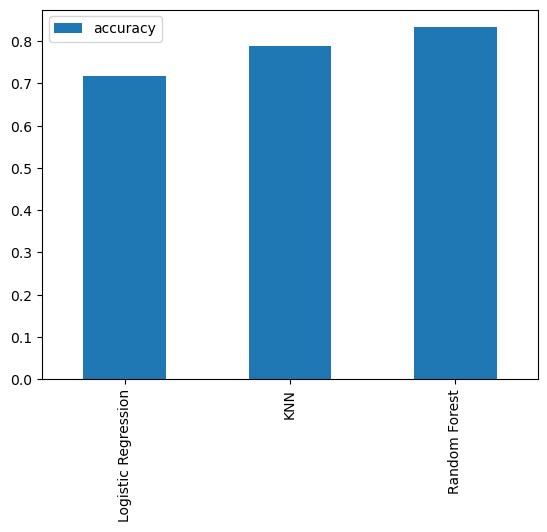

In [81]:
#lets compare the models
#since our model is a classification model, the default score metrix is accuracy which is what we into the dictionary 
#turned to a data frame for the graph below
compare_model_estimate = pd.DataFrame(my_model_score, index=["accuracy"])
compare_model_estimate.T.plot.bar();
plt.show()

Now we have a baseline model and also know our first prediction, we should now do the 
following how we can improve out model furtehr hyperparameter tunning feature importance 
confusion matrix cross-validation precision recall f1 score classification report roc 
curve area under the curve (AUC) the first two above are hyperrameter tunning and feature
importance are part of almost any machine learning model but the rest are specific to classification

In [84]:
# Hyperparameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# Hyperparameter grid for K-Nearest Neighbors (KNN)
knn_grid = {
    "n_neighbors": np.arange(1, 31, 2),          
    "weights": ["uniform", "distance"],           
    "metric": ["euclidean", "manhattan"]          
}

# Hyperparameter grid for Random Forest Classifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}


In [86]:
# lets tune using randomised seach cv since we have hyperparametrs grid setup

In [88]:
#Tune Logistic Regession

np.random.seed(42)

#setup random hyperparameters search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameters search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [89]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [92]:
rs_log_reg.score(x_test, y_test)

0.719

In [94]:
# Setup randomized search for KNN
rs_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=knn_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

In [96]:
# Fit the randomized search model
rs_knn.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [97]:
# View best hyperparameters and score on test set
rs_knn.best_params_, rs_knn.score(x_test, y_test)

({'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}, 0.8025)

In [100]:
# we have tuned for Logistic regression, now lets do same for random forest

In [102]:
np.random.seed(42)

#setup random hyperparameters search for RandomClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameters search model for RandomForestClasifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [104]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [106]:
#Everluate the randomised search RandomForestClassifier Model
rs_rf.score(x_test, y_test)

0.841

In [108]:
# when we evaluate a model, it is comparing how our trained  model predictions compares to the truth label, we
#have to make some predictions first so we can comp

In [110]:
#make predictions with tuned model
y_preds = rs_rf.predict(x_test)

In [112]:
y_preds

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [114]:
y_test

6252    0
4684    1
1731    1
4742    1
4521    1
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: CLASS_LABEL, Length: 2000, dtype: int64

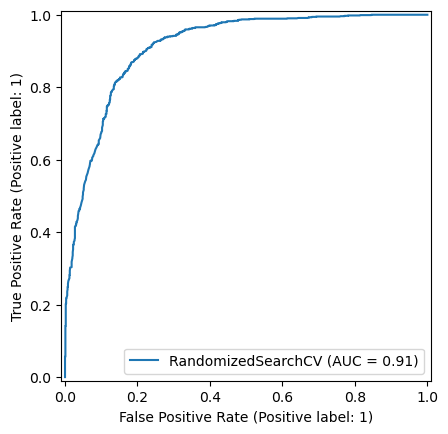

In [116]:
#plot ROC curve and calculation and calculate AUC metric
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rs_rf, x_test, y_test)
plt.show()

#plot_roc_curve(rs_rf, x_test, y_test)

In [118]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[813 175]
 [143 869]]


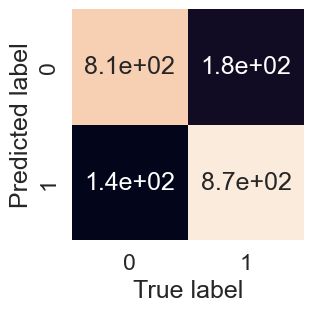

In [120]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn s heatmap ()
    """

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)
plt.show()

In [122]:
# now we have got a ROC curve, an AUC metric and a confusion matrix, lets get a classification
# report as well as cros validation precision, recall and f1 score
#classification report will give us the presision recal and f1 score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       988
           1       0.83      0.86      0.85      1012

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [124]:
#calculate evaluation metrics using cros validation
#we are going to calculate accuracy, precision, recall and f1-score of our model using cross-validation
#to do so we will be using cross_val_score()

In [126]:
#check bset hyperparameter
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [128]:
#create a new classifier with best parameters
clf = LogisticRegression(C=np.float64(9.236708571873866),
                        solver="liblinear")

In [130]:
#cross-validation accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.698 , 0.7475, 0.772 , 0.643 , 0.4905])

In [132]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6702

In [134]:
#cross validation f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.6927385067411904

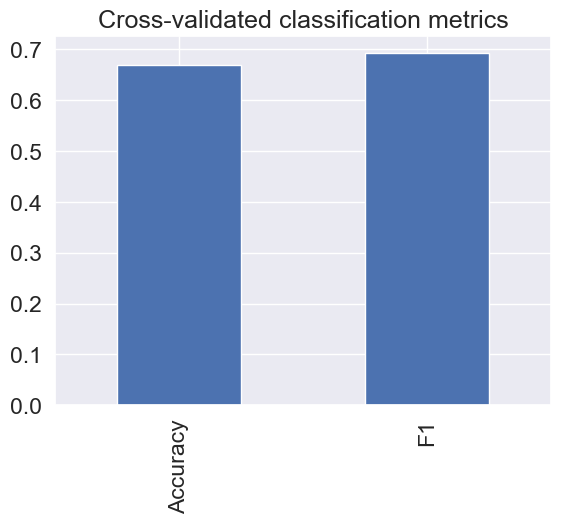

In [136]:
#visualise cross-validation metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "F1":cv_f1},
                          index = [0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend = False)
plt.show()

Feature Important
Feature importance is another as asking, which features contributed most to the outcomes of the model and how did they contribute

In [143]:
phishing_data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [145]:
# Fit an instance of RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,  # you can tune this number
                             max_depth=None,    # or set to a specific depth
                             random_state=42)   # for reproducibility

clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [149]:
feature_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
feature_importances.sort_values(ascending=False)

NumNumericChars       0.309324
UrlLength             0.272103
NumDots               0.181667
QueryLength           0.064855
NumUnderscore         0.047458
NumQueryComponents    0.037941
UrlLengthRT           0.025536
IpAddress             0.022984
NumPercent            0.020910
NumAmpersand          0.017024
NumHash               0.000197
dtype: float64

In [155]:
feature_dict = dict(zip(phishing_data.columns, clf.feature_importances_))
feature_dict

{'NumDots': 0.2721033334083534,
 'SubdomainLevel': 0.3093240883769038,
 'PathLevel': 0.022984441266710353,
 'UrlLength': 0.017024199145916772,
 'NumDash': 0.020910256103381635,
 'NumDashInHostname': 0.1816669036619008,
 'AtSymbol': 0.025535938041180203,
 'TildeSymbol': 0.04745766975813723,
 'NumUnderscore': 0.037940646038795926,
 'NumPercent': 0.00019734823209973567,
 'NumQueryComponents': 0.06485517596662028}

In [159]:
model_data

,UrlLength,NumNumericChars,IpAddress,NumAmpersand,NumPercent,NumDots,UrlLengthRT,NumUnderscore,NumQueryComponents,NumHash,QueryLength,CLASS_LABEL
0,72,0,0,0,0,3,0,0,0,0,0,1
1,144,41,0,1,0,3,-1,2,2,0,103,1
2,58,0,0,0,0,3,0,0,0,0,0,1
3,79,0,0,0,0,3,-1,0,0,0,0,1
4,46,2,0,0,0,3,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,9,0,1,0,3,1,0,2,0,17,0
9996,59,0,0,0,0,2,0,0,0,0,0,0
9997,57,6,0,0,0,2,0,0,0,0,0,0
9998,49,3,0,0,0,3,1,0,1,0,13,0


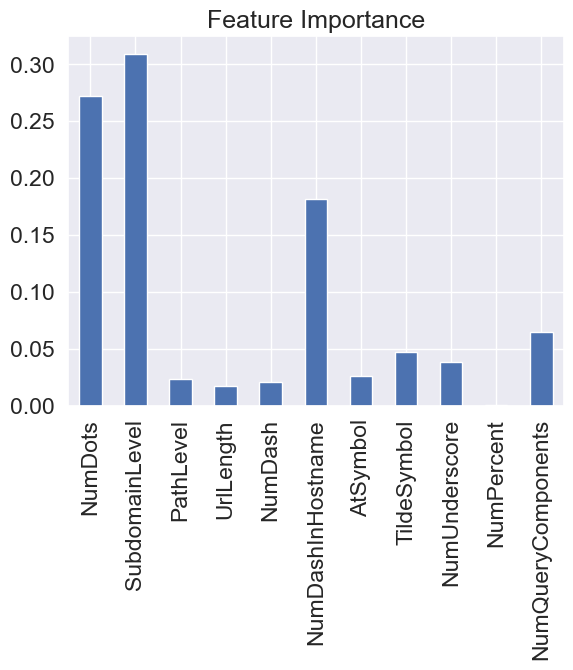

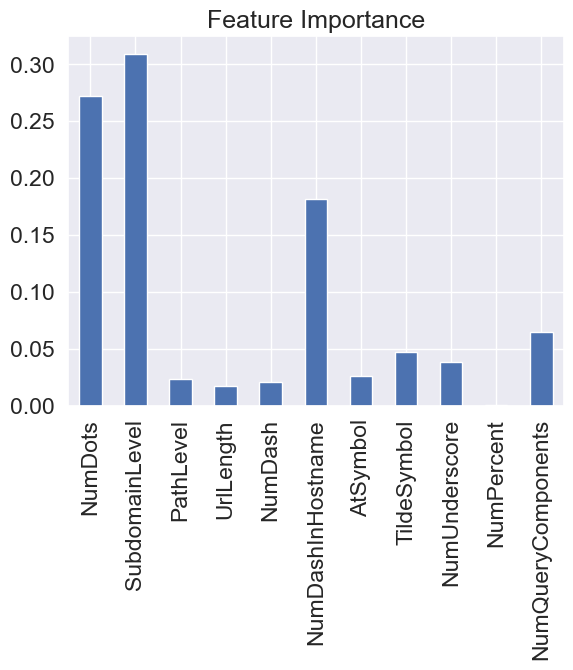

In [163]:
#visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);
plt.show()

In [171]:
pd.crosstab(model_data["NumDots"], model_data["CLASS_LABEL"])

CLASS_LABEL,0,1
NumDots,,
1,1556,403
2,2033,2020
3,1159,1564
4,176,619
5,47,192
6,13,87
7,12,37
8,3,23
9,0,10


In [175]:
import joblib
joblib.dump(rs_rf, "phishing_model.pkl")

['phishing_model.pkl']